### 결정나무 시각화를 위한 기본 준비
_참고: PDF 1-4 Tree model visualization_
Iris 의사결정 경계를 살펴볼 분석·시각화 환경을 세팅합니다.


In [17]:
# 분석/시각화/ML 모듈 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set_theme(style='whitegrid')


### Iris 데이터 적재와 2차원 특성 선택
_참고: PDF 3-4 결정 경계 확인_
petal 길이/너비 위주의 DataFrame을 만들어 시각화용 특성을 정합니다.


In [18]:
# Iris DataFrame과 2차원 특성 정의
iris = datasets.load_iris()
feature_names = iris.feature_names
two_features = ['petal length (cm)', 'petal width (cm)']

df = pd.DataFrame(iris.data, columns=feature_names)
df['species_id'] = iris.target
df['species'] = df['species_id'].apply(lambda idx: iris.target_names[idx])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### mlxtend 설치 및 임포트
_참고: PDF 2 mlxtend 설치_
결정 경계 플롯에 필요한 mlxtend를 필요 시 설치해 불러옵니다.


In [19]:
# mlxtend를 동적으로 설치/임포트 (결정 경계 시각화용)
try:
    from mlxtend.plotting import plot_decision_regions
except ImportError:
    import sys
    import subprocess
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'mlxtend'])
    from mlxtend.plotting import plot_decision_regions


### 전체 데이터의 결정 경계 시각화
_참고: PDF 3-4 iris 결정나무 시각화_
두 개 특성 기반 결정나무의 분류 경계를 전 데이터로 시각화합니다.


/home/clyde/venvs/tf-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/clyde/venvs/tf-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/clyde/venvs/tf-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/clyde/venvs/tf-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/clyde/venvs/tf-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from f

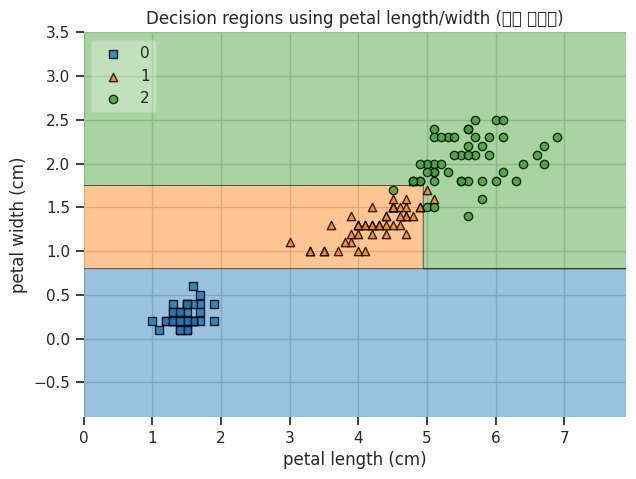

In [20]:
# 전체 데이터로 결정 경계 시각화
X_2d = df[two_features].values
y = iris.target

viz_tree = DecisionTreeClassifier(max_depth=3, random_state=0)
viz_tree.fit(X_2d, y)

plt.figure(figsize=(7, 5))
plot_decision_regions(X_2d, y, clf=viz_tree, legend=2)
plt.title('Decision regions using petal length/width (전체 데이터)')
plt.xlabel(two_features[0])
plt.ylabel(two_features[1])
plt.show()


### 훈련/테스트 데이터 분리와 stratify 옵션
_참고: PDF 5.3-5.7 데이터 분리_
8:2 비율과 stratify 옵션을 사용해 각 품종 비율을 유지하며 분할합니다.


In [21]:
# stratify 옵션을 사용한 train/test 분리 및 분포 확인
X = df[feature_names]
y = df['species_id']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

distribution = pd.DataFrame({
    'train': pd.Series(y_train).value_counts(normalize=True).sort_index(),
    'test': pd.Series(y_test).value_counts(normalize=True).sort_index(),
})
distribution.index = iris.target_names
distribution


,train,test
setosa,0.333333,0.333333
versicolor,0.333333,0.333333
virginica,0.333333,0.333333


### 훈련 데이터로 결정나무 학습
_참고: PDF 5.8-5.10 train 모델링_
train 세트로 모델을 학습하고 훈련 정확도를 살펴봅니다.


In [22]:
# train 세트 기반 결정나무 학습과 훈련 정확도
train_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
train_tree.fit(X_train, y_train)

train_pred = train_tree.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
train_acc


0.9833333333333333

### 테스트 데이터 평가 및 혼동행렬
_참고: PDF 5.11-5.13 평가 단계_
테스트 정확도와 혼동행렬로 일반화 성능을 확인합니다.


In [23]:
# 테스트 정확도 및 혼동행렬/리포트
test_pred = train_tree.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
conf_mat = pd.DataFrame(
    confusion_matrix(y_test, test_pred),
    index=iris.target_names,
    columns=iris.target_names,
)
print(f'Test accuracy: {test_acc:.3f}')
print(classification_report(y_test, test_pred, target_names=iris.target_names))
conf_mat


Test accuracy: 0.967
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



,setosa,versicolor,virginica
setosa,10,0,0
versicolor,0,9,1
virginica,0,0,10


### train/test 결정 경계 비교
_참고: PDF 5.11-5.15 결정 경계 관찰_
동일한 모델을 사용해 train과 test 샘플에서의 경계를 비교합니다.


/home/clyde/venvs/tf-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/clyde/venvs/tf-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/clyde/venvs/tf-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


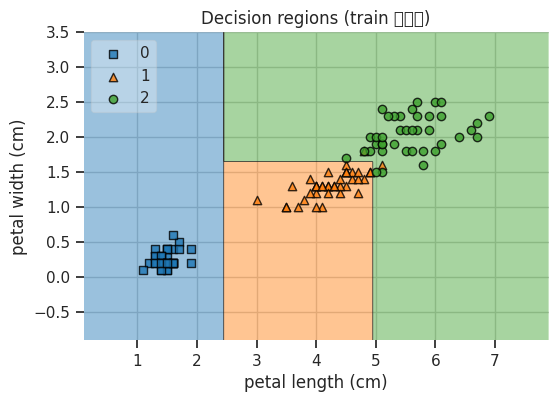

/home/clyde/venvs/tf-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/clyde/venvs/tf-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/clyde/venvs/tf-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


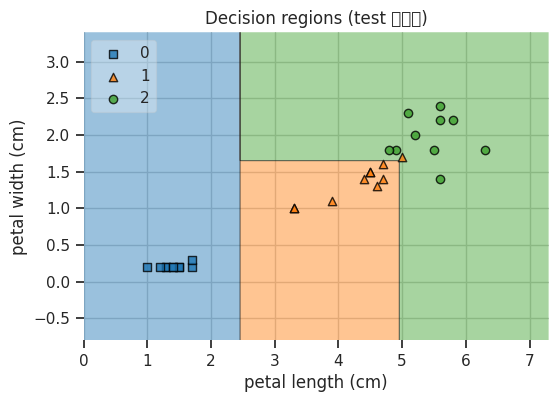

In [24]:
# train/test 데이터의 결정 경계를 별도로 시각화
X_train_2d = X_train[two_features].values
X_test_2d = X_test[two_features].values
y_train_np = y_train.values
y_test_np = y_test.values

boundary_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
boundary_tree.fit(X_train_2d, y_train_np)

plt.figure(figsize=(6, 4))
plot_decision_regions(X_train_2d, y_train_np, clf=boundary_tree, legend=2)
plt.title('Decision regions (train 데이터)')
plt.xlabel(two_features[0])
plt.ylabel(two_features[1])
plt.show()

plt.figure(figsize=(6, 4))
plot_decision_regions(X_test_2d, y_test_np, clf=boundary_tree, legend=2)
plt.title('Decision regions (test 데이터)')
plt.xlabel(two_features[0])
plt.ylabel(two_features[1])
plt.show()


### 모든 특성 사용 및 중요도 확인
_참고: PDF 5.16-5.19 주요 특성 확인_
네 개 특성 전부로 모델을 학습하고 중요도 및 예측을 살펴봅니다.


In [25]:
# 모든 특성 사용 모델과 중요도/예측 확인
full_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
full_tree.fit(X, y)

importances = pd.Series(full_tree.feature_importances_, index=feature_names)
importances = importances.sort_values(ascending=False)
print('Feature importances (전체 데이터):')
print(importances)

sample = [[4.9, 3.0, 1.4, 0.2]]
pred_idx = full_tree.predict(sample)[0]
pred_name = iris.target_names[pred_idx]
print(f'Sample prediction: {pred_name}')
print('Probability:', full_tree.predict_proba(sample))


Feature importances (전체 데이터):
petal length (cm)    0.558165
petal width (cm)     0.428322
sepal width (cm)     0.013514
sepal length (cm)    0.000000
dtype: float64
Sample prediction: setosa
Probability: [[1. 0. 0.]]


/home/clyde/venvs/tf-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/clyde/venvs/tf-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### zip과 언패킹으로 중요도 다루기
_참고: PDF 5.20 zip과 언패킹_
zip/unzip 예제로 특성-중요도 쌍을 다루는 방법을 보여줍니다.


In [26]:
# zip/unzip으로 (특성, 중요도) 쌍 다루기
feature_importance_pairs = list(zip(feature_names, full_tree.feature_importances_))
importance_dict = dict(feature_importance_pairs)

print('Pairs:', feature_importance_pairs)
print('Dict:', importance_dict)

names, scores = zip(*feature_importance_pairs)
names, scores


Pairs: [('sepal length (cm)', np.float64(0.0)), ('sepal width (cm)', np.float64(0.01351351351351351)), ('petal length (cm)', np.float64(0.5581648224311269)), ('petal width (cm)', np.float64(0.42832166405535965))]
Dict: {'sepal length (cm)': np.float64(0.0), 'sepal width (cm)': np.float64(0.01351351351351351), 'petal length (cm)': np.float64(0.5581648224311269), 'petal width (cm)': np.float64(0.42832166405535965)}


(('sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'),
 (np.float64(0.0),
  np.float64(0.01351351351351351),
  np.float64(0.5581648224311269),
  np.float64(0.42832166405535965)))